# Kaggle: Two Sigma Financial Modeling Challenge using RL
- https://www.kaggle.com/c/two-sigma-financial-modeling

In [1]:
import h5py
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Import dataset and learn more about the data

In [10]:
with pd.HDFStore("Data/train.h5",'r') as train:
    df = train.get("train")

In [11]:
len(df)

1710756

In [12]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [15]:
df.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,...,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.536046e+00,7.729436e+11,-3.320328e-01,-5.046012e-01,1.801661e+01,-2.040938e-02,-5.703754e+08,-1.622954e-01,...,-8.584833e-02,-9.103397e-02,-8.156685e-02,-7.287001e-02,4.908321e-02,5.236218e-03,-1.699966e-02,-9.735299e-01,3.881475e-04,2.217509e-04
std,6.308563e+02,5.195685e+02,2.497382e+02,7.620606e+13,6.519810e+01,1.020749e+02,9.258360e+02,2.494859e-01,7.502322e+10,3.668149e+00,...,6.125852e-01,2.471038e-01,2.346534e-01,2.235729e-01,3.102316e-01,1.133733e-01,2.116284e-01,9.605551e-01,3.011983e-02,2.240643e-02
min,0.000000e+00,0.000000e+00,-2.017497e+04,-7.375435e-02,-9.848880e+03,-3.434176e+04,-8.551914e+03,-2.344957e+00,-1.043737e+13,-1.077101e+03,...,-1.687572e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-5.250904e-01,-4.449529e-01,-1.000000e+00,-2.000000e+00,-1.265686e-01,-8.609413e-02
25%,5.500000e+02,5.040000e+02,-1.449710e-01,-2.956479e-02,-5.967524e-02,-1.655826e-01,-1.057050e-01,-1.996543e-01,-1.960470e-01,-2.280967e-01,...,-4.050297e-01,-4.651562e-04,-1.992532e-04,-2.203252e-05,-1.521701e-01,-7.377038e-02,-3.887695e-15,-2.000000e+00,-1.998819e-02,-9.561389e-03
50%,1.098000e+03,9.560000e+02,-8.368272e-04,5.523058e-03,2.109505e-02,2.475614e-03,1.175234e-02,-4.064488e-02,-7.395084e-03,-3.029069e-02,...,-8.502064e-02,-3.951567e-12,-1.418487e-13,-1.591224e-16,-1.476793e-02,9.782702e-05,0.000000e+00,-6.597540e-01,1.117279e-05,-1.570681e-04
75%,1.657000e+03,1.401000e+03,1.199108e-01,1.078554e-01,1.952209e-01,3.037236e-01,1.556464e-01,1.303819e-01,1.832071e-01,1.764751e-01,...,1.909600e-01,-5.219879e-40,0.000000e+00,0.000000e+00,1.772415e-01,7.855728e-02,0.000000e+00,-5.188884e-08,2.047074e-02,9.520990e-03
max,2.158000e+03,1.812000e+03,3.252527e+03,1.068448e+16,3.823001e+03,1.239737e+03,6.785965e+04,1.378195e+00,5.203165e+02,7.677125e+01,...,4.957758e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.569265e+00,6.844833e-01,1.000000e+00,0.000000e+00,1.435858e-01,9.349781e-02


In [46]:
df.columns.tolist()

['id',
 'timestamp',
 'derived_0',
 'derived_1',
 'derived_2',
 'derived_3',
 'derived_4',
 'fundamental_0',
 'fundamental_1',
 'fundamental_2',
 'fundamental_3',
 'fundamental_5',
 'fundamental_6',
 'fundamental_7',
 'fundamental_8',
 'fundamental_9',
 'fundamental_10',
 'fundamental_11',
 'fundamental_12',
 'fundamental_13',
 'fundamental_14',
 'fundamental_15',
 'fundamental_16',
 'fundamental_17',
 'fundamental_18',
 'fundamental_19',
 'fundamental_20',
 'fundamental_21',
 'fundamental_22',
 'fundamental_23',
 'fundamental_24',
 'fundamental_25',
 'fundamental_26',
 'fundamental_27',
 'fundamental_28',
 'fundamental_29',
 'fundamental_30',
 'fundamental_31',
 'fundamental_32',
 'fundamental_33',
 'fundamental_34',
 'fundamental_35',
 'fundamental_36',
 'fundamental_37',
 'fundamental_38',
 'fundamental_39',
 'fundamental_40',
 'fundamental_41',
 'fundamental_42',
 'fundamental_43',
 'fundamental_44',
 'fundamental_45',
 'fundamental_46',
 'fundamental_47',
 'fundamental_48',
 'fund

In [43]:
# print a null value
labels = []
values = []

for col in df.columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
    print(col, values[-1])

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

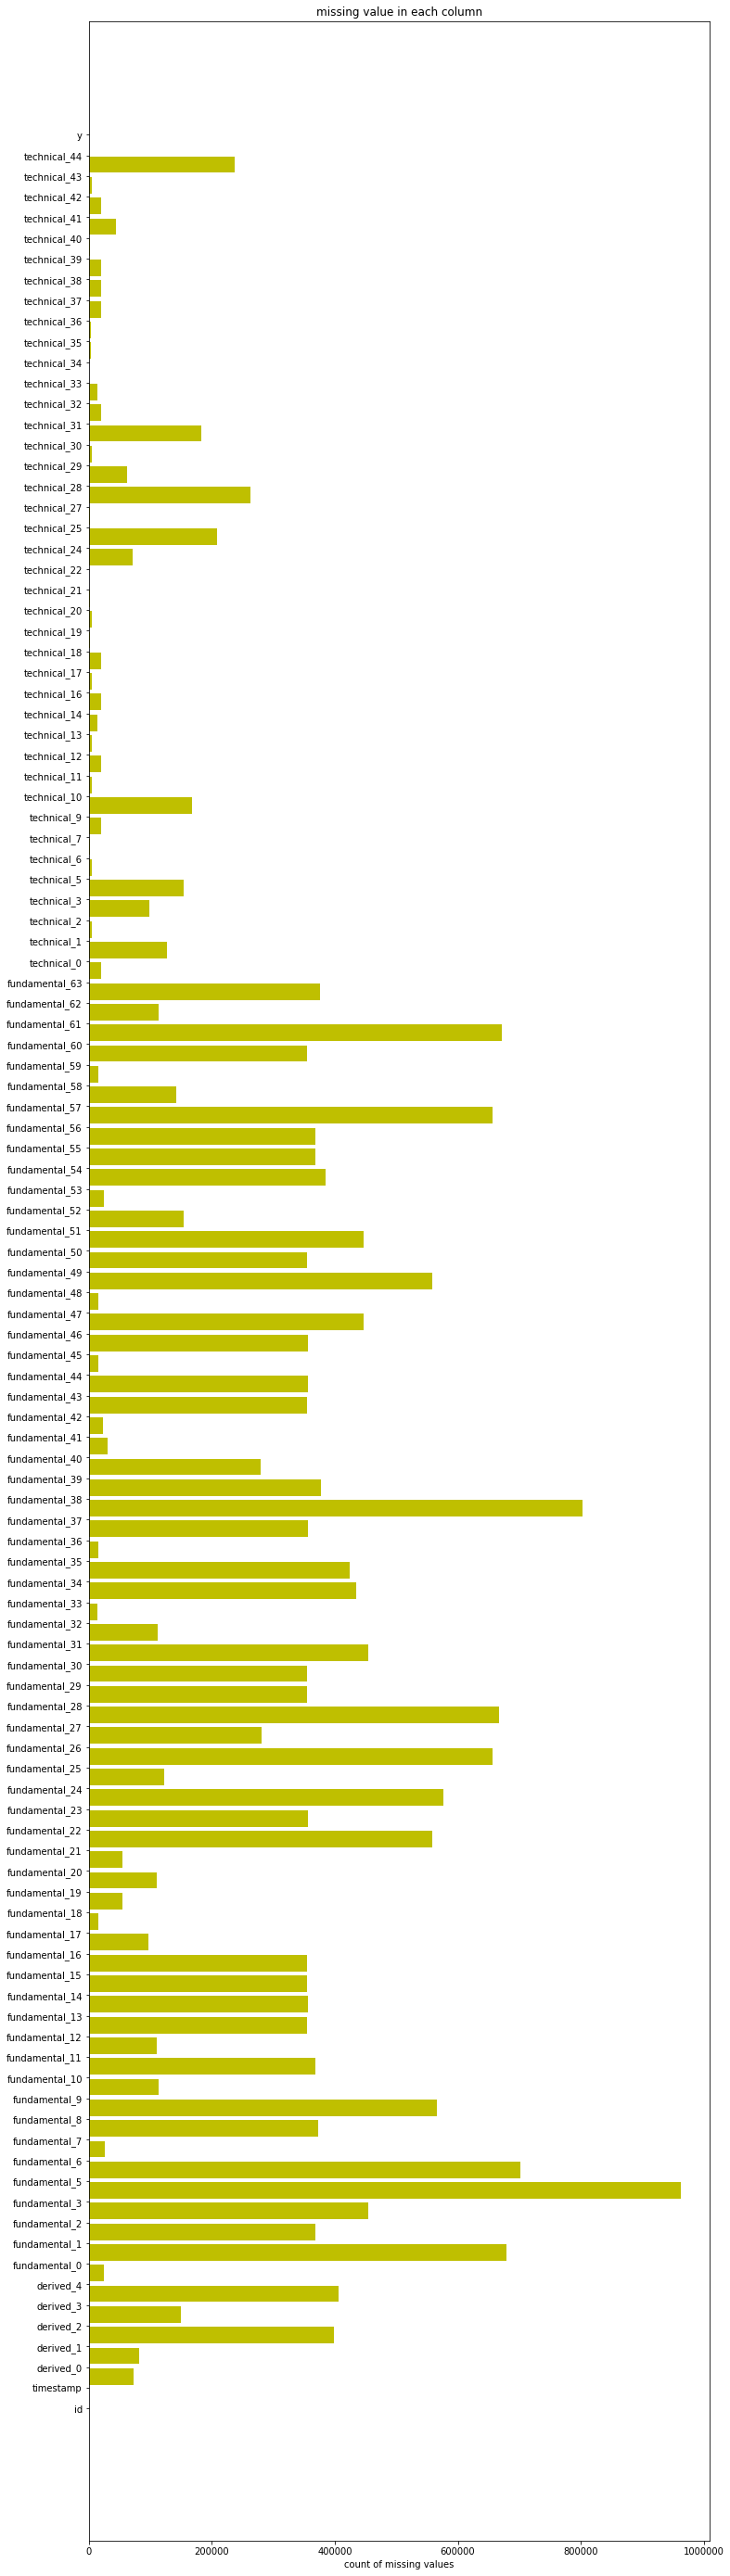

In [44]:
# How much missing data do we have


ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))

# plot horizontal bar chart
ax.barh(ind,np.array(values),color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation = 'horizontal')
ax.set_xlabel('count of missing values')
ax.set_title('missing value in each column')
plt.show()

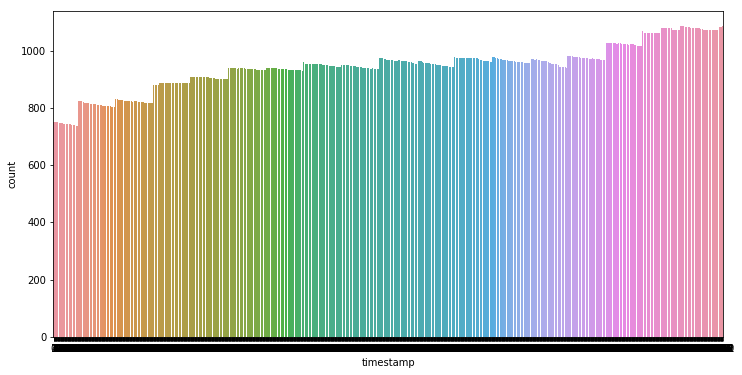

In [24]:
import seaborn as sns

fig = plt.figure(figsize=(12,6))
sns.countplot(x='timestamp',data=df)
plt.show()

In [26]:
# Unique assets
print(len(df.id.unique()))

1424


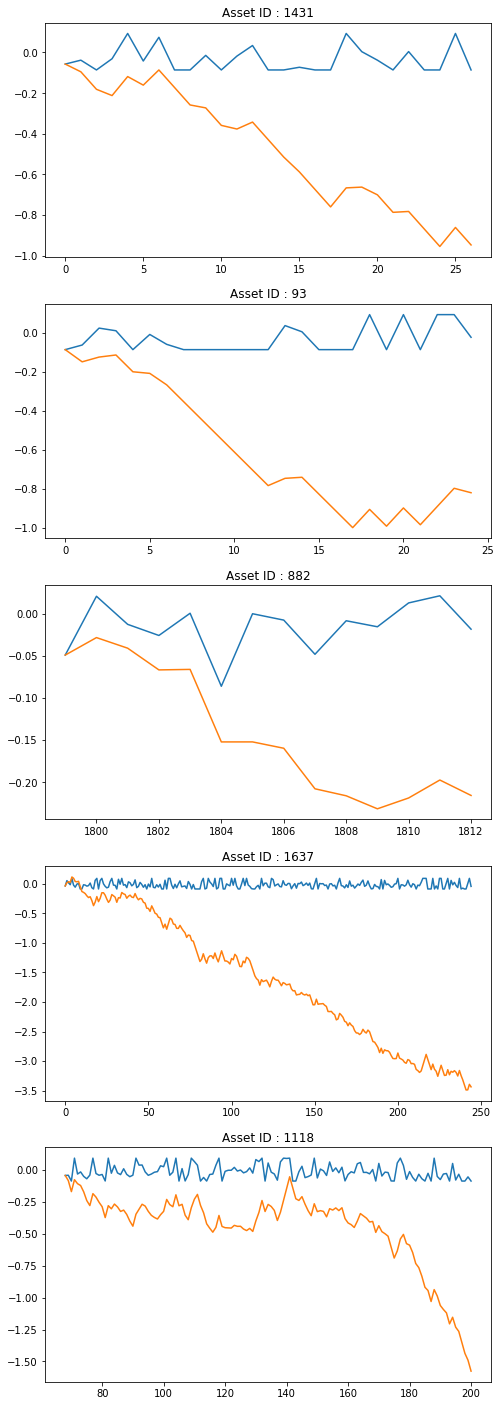

In [50]:
id_to_use = [1431, 93, 882, 1637, 1118]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.loc[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

### Training model

In [59]:
# Define loss function
# https://www.kaggle.com/c/two-sigma-financial-modeling#evaluation

from sklearn.metrics import r2_score

def r_score(pred,actual):
    r2 = r2_score(pred,actual)
    # np.sign return the sign of the value (plus, minus)
    r = np.max([-1,np.sign(r2)*np.sqrt(np.abs(r2))])
    return r


### Define the environment

In [68]:
class Observation(object):
    def __init__(self, train, target, features):
        self.train = train
        self.target = target
        self.features = features


class Environment(object):
    def __init__(self):
        with pd.HDFStore("Data/train.h5", "r") as hfdata:
            self.timestamp = 0
            fullset = hfdata.get("train")
            self.unique_timestamp = fullset["timestamp"].unique()
            # Get a list of unique timestamps
            # use the first half for training and
            # the second half for the test set
            n = len(self.unique_timestamp)
            i = int(n/2)
            timesplit = self.unique_timestamp[i]
            self.n = n
            self.unique_idx = i
            self.train = fullset[fullset.timestamp < timesplit]
            self.test = fullset[fullset.timestamp >= timesplit]

            # Needed to compute final score
            self.full = self.test.loc[:, ['timestamp', 'y']]
            self.full['y_hat'] = 0.0
            self.temp_test_y = None

    def reset(self):
        timesplit = self.unique_timestamp[self.unique_idx]

        self.unique_idx = int(self.n / 2)
        self.unique_idx += 1
        subset = self.test[self.test.timestamp == timesplit]

        # reset index to conform to how kagglegym works
        target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
        self.temp_test_y = target['y']

        target.loc[:, 'y'] = 0.0  # set the prediction column to zero

        # changed bounds to 0:110 from 1:111 to mimic the behavior
        # of api for feature
        features = subset.iloc[:, :110].reset_index(drop=True)

        observation = Observation(self.train, target, features)
        return observation

    def step(self, target):
        timesplit = self.unique_timestamp[self.unique_idx-1]
        # Since full and target have a different index we need
        # to do a _values trick here to get the assignment working
        y_hat = target.loc[:, ['y']]
        self.full.loc[self.full.timestamp == timesplit, ['y_hat']] = y_hat._values

        if self.unique_idx == self.n:
            done = True
            observation = None
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            score = r_score(self.full['y'], self.full['y_hat'])
            info = {'public_score': -score}
        else:
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            done = False
            info = {}
            timesplit = self.unique_timestamp[self.unique_idx]
            self.unique_idx += 1
            subset = self.test[self.test.timestamp == timesplit]

            # reset index to conform to how kagglegym works
            target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
            self.temp_test_y = target['y']

            # set the prediction column to zero
            target.loc[:, 'y'] = 0

            # column bound change on the subset
            # reset index to conform to how kagglegym works
            features = subset.iloc[:, 0:110].reset_index(drop=True)

            observation = Observation(self.train, target, features)

        return observation, reward, done, info

    def __str__(self):
        return "Environment()"

In [73]:
def make():
    return Environment()

def test():
    env=make()
    observation = env.reset()
    
    print(len(observation.target))
    print(len(observation.train))
    
    n=0
    
    rewards = []
    
    while True:
        target = observation.target
        target.loc[:'y'] = 0.0006
        observation, reward, done, info = env.step(target)
        if done:
            break
        rewards.append(reward)
        n = n+1
    
    print(info)
    print(n)
    print(rewards[0:15])
            

In [74]:
test()

968
806298
{'public_score': 0.017829389044606993}
906
[-0.15367924219682547, -0.026140842058380256, -0.11231466648997339, -0.1682864647754967, -0.02167206673334583, -0.08693960274478746, -0.30473984896980755, -0.09382985372389648, -0.09945405540987054, -0.05014964521079367, -0.14505984849997253, -0.19402383221313182, -0.0017121406664662242, -0.01388272905431911, -0.2019392220527433]
